Before starting the machine design we have to know or determine:
-mechanical power output
-rated stator voltage and frequency
-rated rotor speed


# Tesla Model S Induction Machine Design

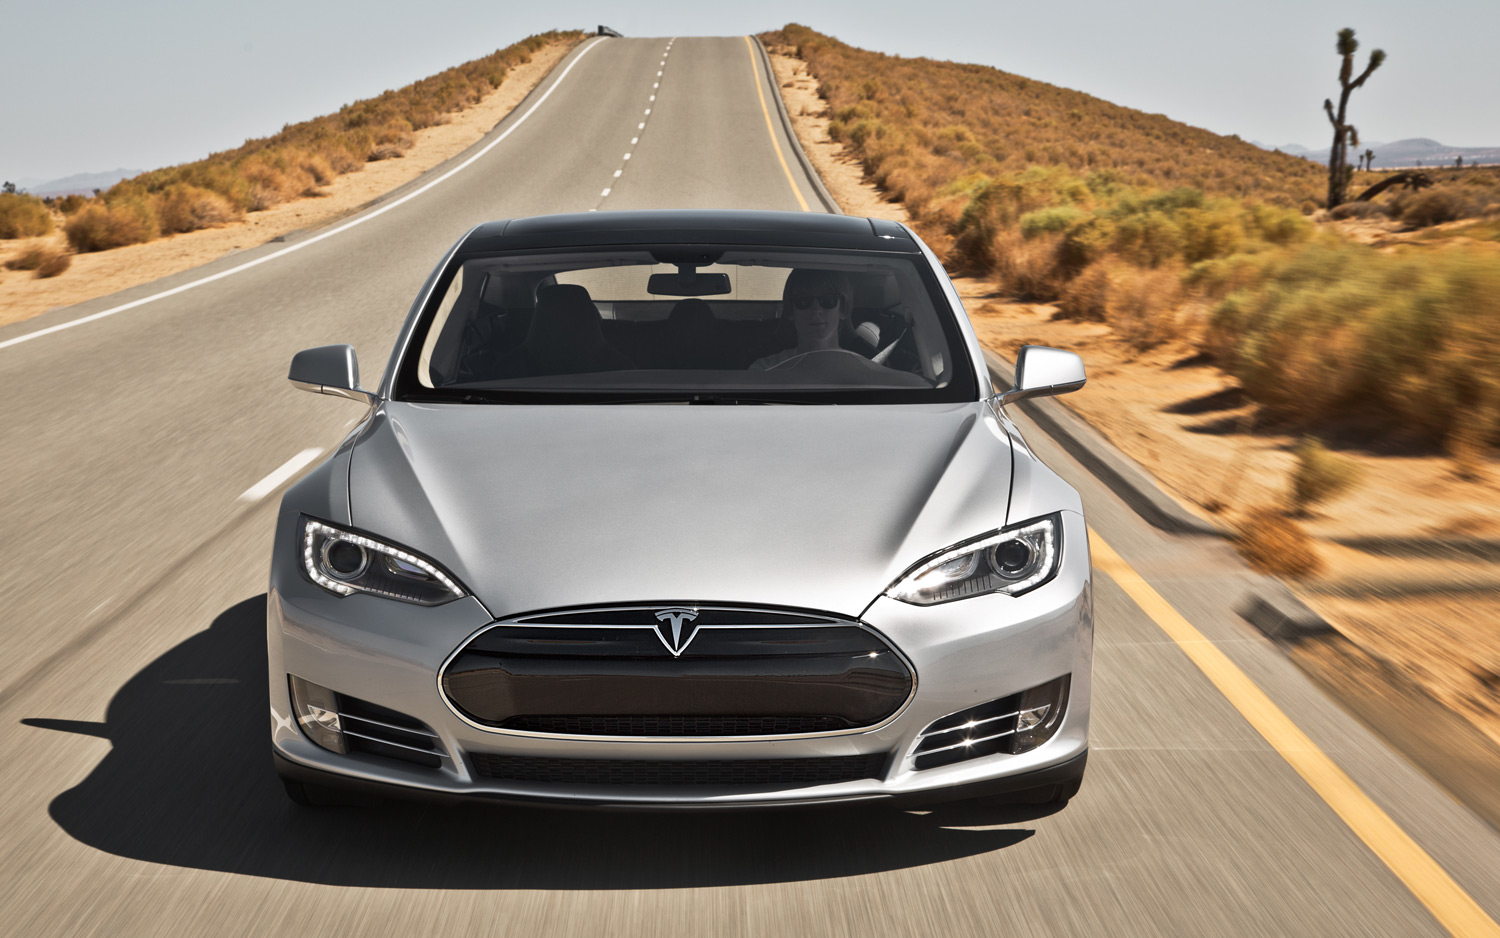

In [1]:
from IPython.display import Image
Image(filename='teslas.jpg',width=1000) 

In [2]:
import math

p_rated=270000 # in watts
speed_max=225 # kmh
# efficiency and pf are assumed 
#while the gear ratio is an original parameter
# of the car
gear_ratio=9.73 
pf=0.90
efficiency=0.95
s=0.02 # slip
U_o=4*math.pi/10000000 # permeability of free space

In [3]:
#wheel rpm calculation
d_tire=27.7 # diameter of tire is 27.7"
d_tire=27.7*2.54/100 # diameter in m
p_tire=d_tire*math.pi ;  # perimeter of tire in m
p_tire=p_tire/1000 ; # perimeter of tire in km
wheel_rph=speed_max/p_tire ; # round per hour
wheel_rpm=wheel_rph/60 ; # round per hour
wheel_rpm=math.floor(wheel_rpm)

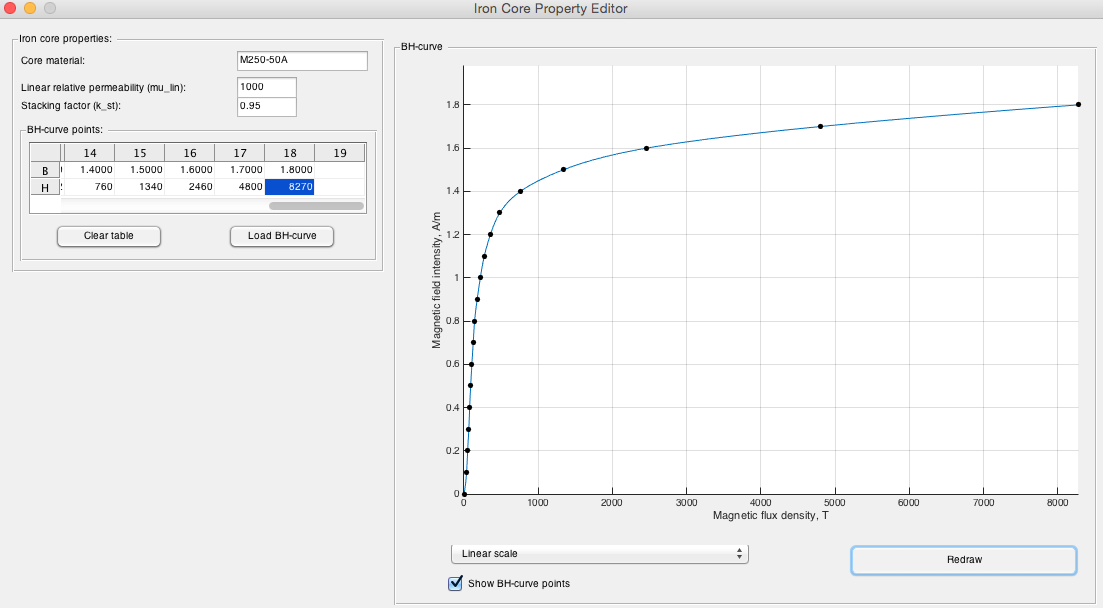

In [4]:
from IPython.display import Image
Image(filename='B_H.png',width=1000) 

In [5]:
wheel_rpm

1696

In [6]:
#electric motor rpm
motor_rpm=wheel_rpm*gear_ratio ;
motor_rpm=round(motor_rpm)

#V_fundamental calculation
v_battery=375 # V given
v_fund_rms=(v_battery/2)*(4/math.pi)/math.sqrt(2) # for one phase
v_fund_rms_linetoline=v_fund_rms*math.sqrt(3) # line to line voltage

In [7]:
v_fund_rms


168.80930927945738

In [8]:
v_fund_rms_linetoline

292.3863004626285

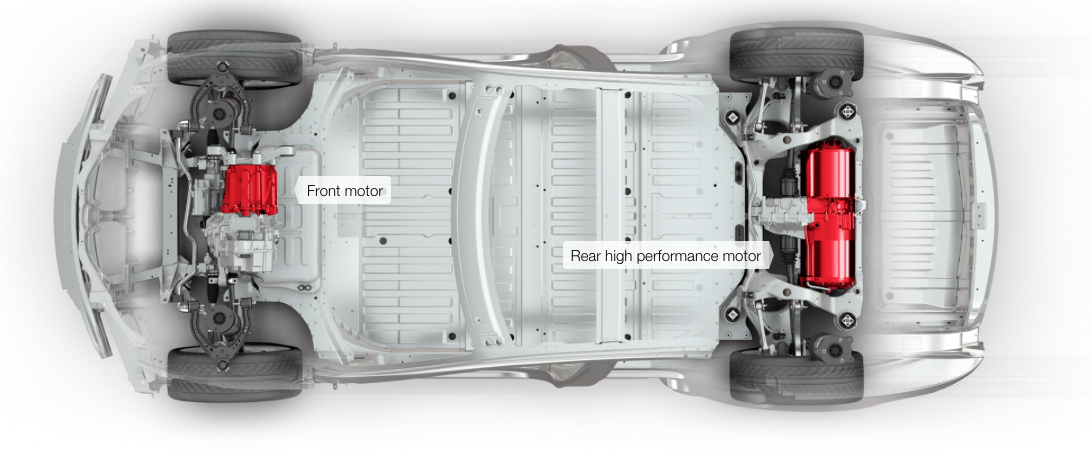

In [9]:
from IPython.display import Image
Image(filename='tesla1.png',width=900) 

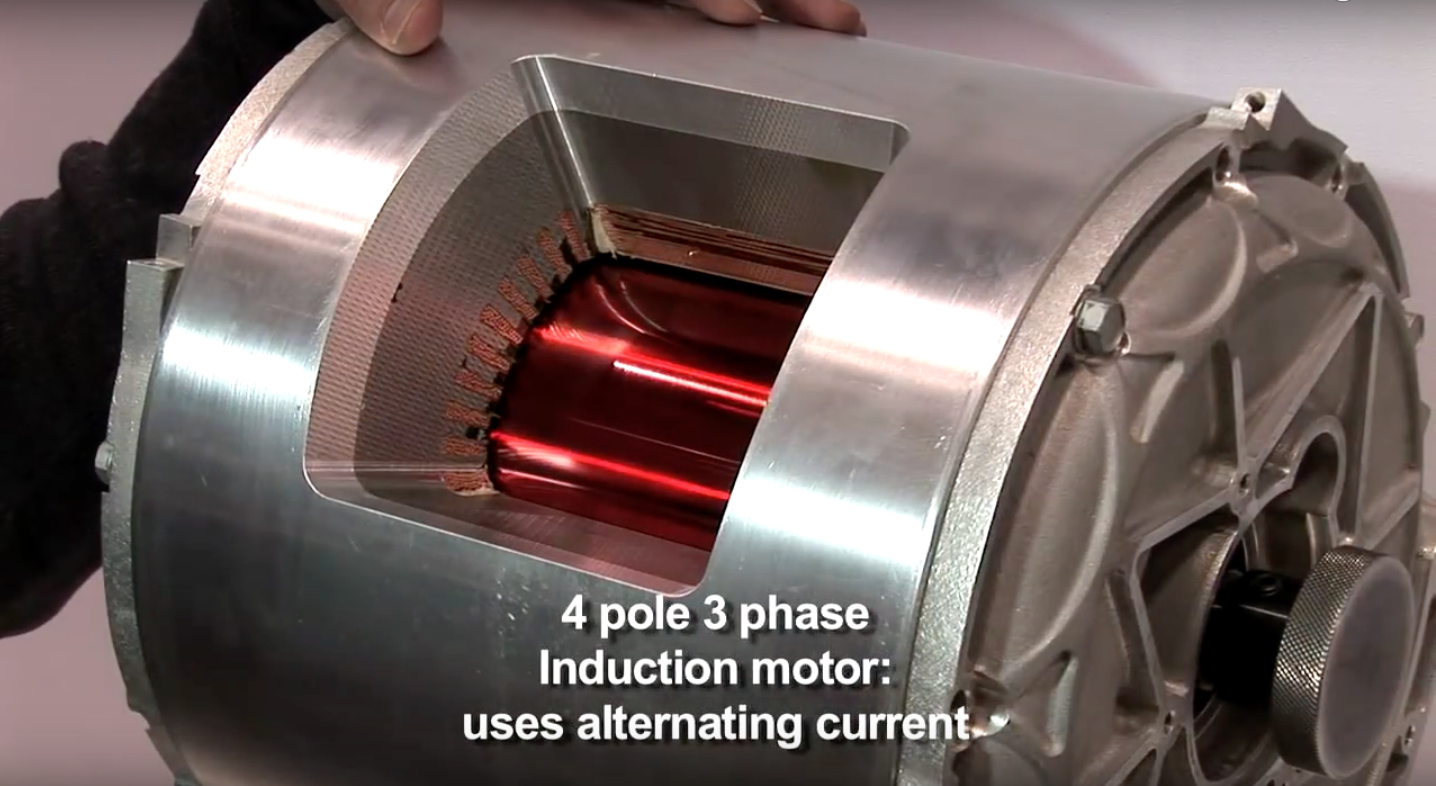

In [10]:
from IPython.display import Image
Image(filename='pole+phase.png',width=900) 

Fig : 4 pole 3 phase IM of Tesla Model Motor

In [11]:
pole=4
pole_pair=pole/2
phase=3
fmax=motor_rpm*pole/120
print('fmax=',round(fmax),'Hz')

fmax= 550 Hz


In [12]:
f_rated=fmax*(80/225)
print('f_rated=',round(f_rated),'Hz')

f_rated= 196 Hz


# MAIN DIMENSIONS OF STATOR CORE

In [13]:
K_e=0.98-0.005*pole/2
print('K_e=',K_e)

K_e= 0.97


In [14]:
S_gap=(K_e*p_rated)/(efficiency*pf) # The apparent airgap power in VA
print('S_gap=',round(S_gap),'VA')

S_gap= 306316 VA


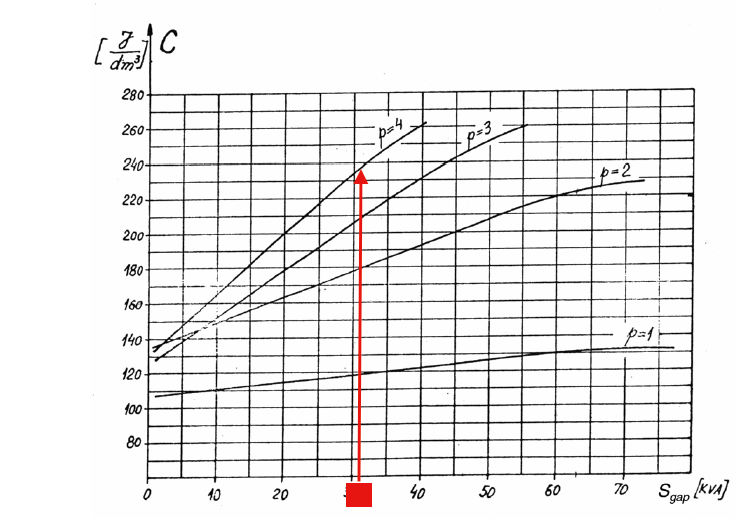

In [15]:
from IPython.display import Image
Image(filename= 'essons.png', width=400) 

Fig : Esson’s constant in J/dm^3

In [16]:
Co=240 # Esson’s constant in J/dm^3
Co=300*1000 #Esson’s constant in J/m^3

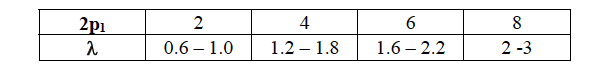

In [17]:
from IPython.display import Image
Image(filename= 'stack_aspect_ratio.png', width=400) 

Fig: Stack aspect ratio

We have chosen Stack aspect ratio λ as 1.6

In [18]:
λ=1.6
D_is=math.pow((2*(pole/2)*(pole/2)*S_gap)/(math.pi*f_rated*λ*Co),1/3)
print ('stator bore diameter=',round((D_is)*1000,3),'mm')



stator bore diameter= 202.542 mm


In [19]:
L=(λ*math.pi*D_is)/(2*2)
print ('Stack Length=',round(L,5)*1000,'mm')

Stack Length= 254.52 mm


In [20]:
τ=math.pi*D_is/(2*2) # in m
print ('pole pitch=',round(τ,5)*1000,'mm')

pole pitch= 159.08 mm


The number of stator slots per pole 3*q may be 3x3=9 
The slot pitch τ_s would be around:

In [21]:
q=3
τ_s=τ/(3*4) # in m
print ('slot pitch=',round(τ_s,5)*1000,'mm')

slot pitch= 13.26 mm


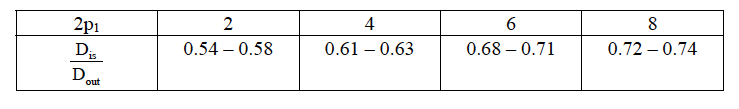

In [22]:
from IPython.display import Image
Image(filename= 'inner_outer.png', width=400) 

Due to 4 pole structure, we have chosen K_d=0.62


In [23]:
K_d=0.62
D_out=D_is/K_d
print ('D_out=',round(D_out,5)*1000,'mm')

D_out= 326.68 mm


In [24]:
g=(0.1+0.012*math.pow(p_rated,1/3)) # air gap in mm for pole #4 
print ('air gap=',round(g,3),'mm')

air gap= 0.876 mm


# The Stator Winding

In [25]:
N_stator=2*pole_pair*q*phase
print ('Number of stator slots=',round(N_stator,3))

Number of stator slots= 36.0


In [26]:
α_ec=(2*math.pi*pole_pair)/N_stator #The electrical angle between emfs in neighboring slots
print ('α_ec=',round(α_ec ,3))

α_ec= 0.349


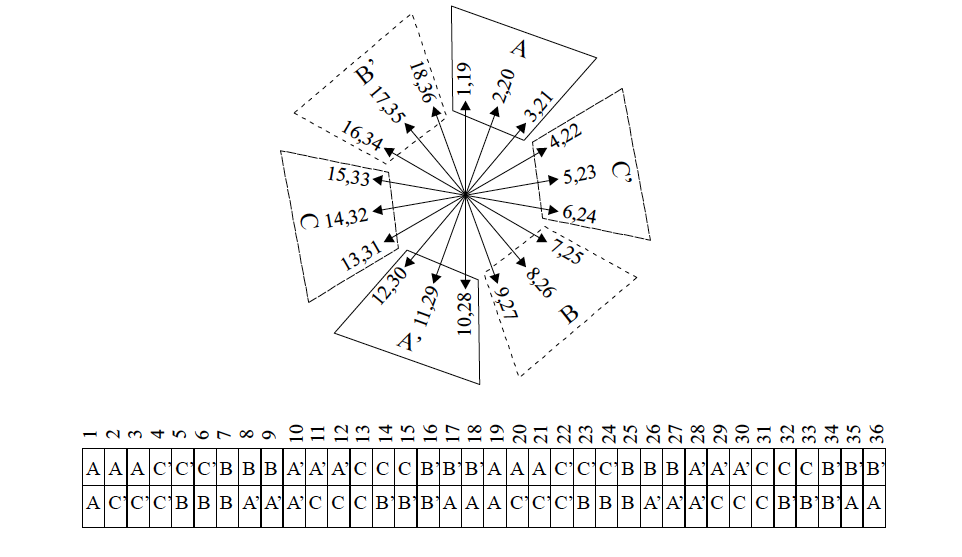

In [27]:
from IPython.display import Image
Image(filename= 'coil.png', width=700) 

Fig : Winding diagram of the motor

In [28]:
K_q1=(math.sin(math.pi/6))/(3*math.sin(math.pi/18))
print ('K_q1=',round(K_q1 ,3))

K_q1= 0.96


In [29]:
K_y1=math.sin(math.pi*7/18)
print ('K_y1=',round(K_y1 ,3))

K_y1= 0.94


In [30]:
K_w1=K_q1*K_y1
print ('K_w1=',round(K_w1 ,3))

K_w1= 0.902


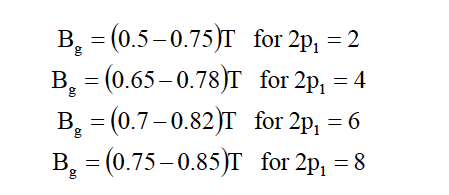

In [31]:
from IPython.display import Image
Image(filename='airgap.png',width=400) 

Fig: Recommended airgap flux density,we have chosen 0.7

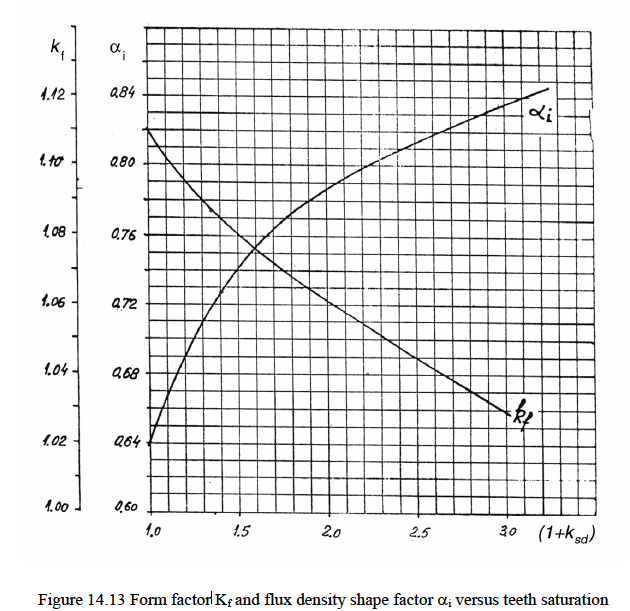

In [32]:
from IPython.display import Image
Image(filename='kf-ai.png',width=600) 

In [33]:
αi = 0.729 # The pole spanning coefficient
Kf = 1.085 # form factor
Bg = 0.7 # airgap flux density

In [34]:
φ = αi*τ*L*Bg #pole flux
print ('pole flux=',round(φ,3),'Wb')

pole flux= 0.021 Wb


In [35]:
V1_ph=v_battery/math.sqrt(3*2)
W1=(K_e*V1_ph)/(4*Kf*K_w1*f_rated*φ)
print ('turns/phase=',round(W1))

turns/phase= 9


In [36]:
a1=2 # number of paralel coils
ns=(a1*W1)/(pole_pair*q)
print ('conductors/slot=',round(ns),'-1') # it must be a even number due to double layer windings

conductors/slot= 3 -1


In [37]:
ns=2 # it must be even number
print ('conductors/slot=',round(ns)) 

conductors/slot= 2


In [38]:
W2=pole_pair*q*round(ns) 
print ('recalculated turns/phase=',round(W2))


recalculated turns/phase= 12


In [39]:
Bg=Bg*W1/W2 # actual airgap flux density
print ('actual airgap flux density=',round(Bg,5),'Tesla')

actual airgap flux density= 0.54766 Tesla


In [40]:
I_rated=p_rated/(efficiency*pf*math.sqrt(3)*v_fund_rms_linetoline)
print ('rated current=',round(I_rated ,5),'A')

rated current= 623.56252 A


Jcos should be between 4 to 7 A/mm^2 for 4 pole machine,so we have chosen 6 for our case.

In [41]:
J_cos=6 # recommended current density in a/mm^2

In [42]:
A_co=I_rated/(J_cos*a1)
print ('magnetic wire cross section =',round(A_co ,5),'Cm^2')

magnetic wire cross section = 51.96354 Cm^2


In [43]:
D_co=math.sqrt(4*A_co/math.pi)
print ('wire gauge diameter=',round(D_co ,5),'mm')

wire gauge diameter= 8.13401 mm


In general, if D_co > 1.3 mm in low power IMs, we may use a few conductors
in parallel ap

In [44]:
a_p=100 #conductors in parallel
D_co2=math.sqrt(4*A_co/(math.pi*a_p))
print ('recalculated wire gauge diameter=',round(D_co2 ,3),'mm')


recalculated wire gauge diameter= 0.813 mm


# Stator Slot Sizing

As we know by now, the number of turns per slot ns and the number of
conductors in parallel ap with the wire diameter D_co2, we may calculate the
useful slot area A_su provided we adopt a slot fill factor K_fill. For round wire, K_fill=0.35                          to 0.4 below 10 kW and 0.4 to 0.44 above 10 kW.

In [45]:
K_fill=0.44 # slot fill factor
A_su=(math.pi*D_co2*D_co2*a_p*ns)/(4*K_fill)
print ('useful slot area=',round(A_su,4),'in mm^2')


useful slot area= 236.1979 in mm^2


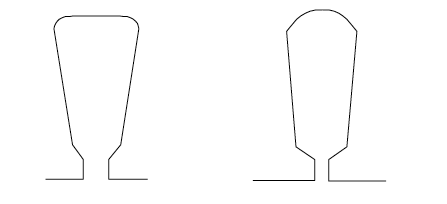

In [46]:
from IPython.display import Image
Image(filename='stator_slot_shape.png',width=400) 

     Fig : Recommended stator slot shapes

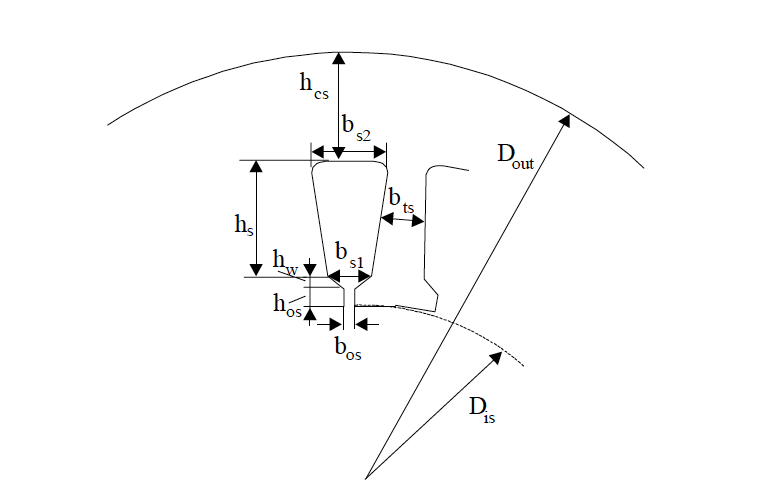

In [47]:
from IPython.display import Image
Image(filename='stator_slot.png',width=600) 

                 Fig: stator slot geometry

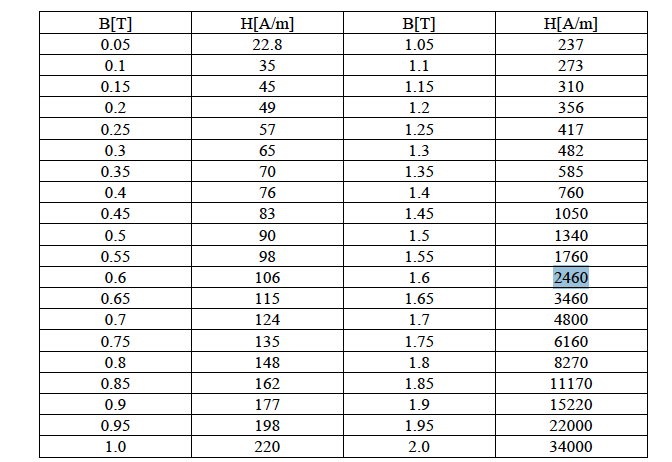

In [48]:
from IPython.display import Image
Image(filename='lamination1.png',width=600) 

Fig : Lamination B-H curve

In [49]:
K_fe=0.96
B_ts=1.6
H_ts=2460
b_ts=(Bg*τ_s)/(B_ts*K_fe) # in m

In [50]:
print ('b_ts=',round(b_ts*1000,3),'mm')


b_ts= 4.727 mm


With bos = 2.3e-3 m, hos=1⋅1e-3 m, hw = 1.4e-3 m, the slot lower width bs1

In [51]:
bos =23e-4
hos=11e-4
hw =14e-4 

In [52]:
bs1=(math.pi*(D_is+2*hos+2*hw)/(N_stator))-b_ts
print ('bs1=',round(bs1*1000,3),'mm')

bs1= 13.385 mm


In [53]:
bs2=math.sqrt(4*A_su*1e-6*math.tan(math.pi/N_stator)+bs1*bs1)
print ('bs2=',round(bs2*1000,3),'mm')

bs2= 16.181 mm


In [54]:
#g=1
#Bg=0.7

In [55]:
hs=2*A_su/(1000000*(bs1+bs2))
print ('hs=',round(hs*1000,3),'mm')

hs= 15.978 mm


In [56]:
F_mg=(1.2*Bg*(g/1000))/U_o
print ('F_mg=',round(F_mg),'Aturns')

F_mg= 458 Aturns


In [57]:
Fm_ts=H_ts*(hos+hs+hw)
round(Fm_ts) # Aturns
print ('Fm_ts=',round(Fm_ts),'Aturns')

Fm_ts= 45 Aturns


In [58]:
Fm_tr=0.4*F_mg-Fm_ts # m
print ('Fm_tr=',round(Fm_tr),'Aturns')

Fm_tr= 138 Aturns


However, if Fm_tr << Fm_ts (or negative), it would mean that for
given 1 + Kst, a smaller value of flux density Bg is required.Fortunately our calculations are consistent with this equation.

In [59]:
H_cs=(D_out-(D_is+2*(hos+hw+hs)))/2
print ('H_cs=',round(H_cs*1000,3),'mm')

H_cs= 43.591 mm


In [60]:
B_cs=φ/(2*L*H_cs)
print ('B_cs=',round(B_cs,3),'T')

B_cs= 0.931 T


This is a reasonable value.

# ROTOR SLOTS

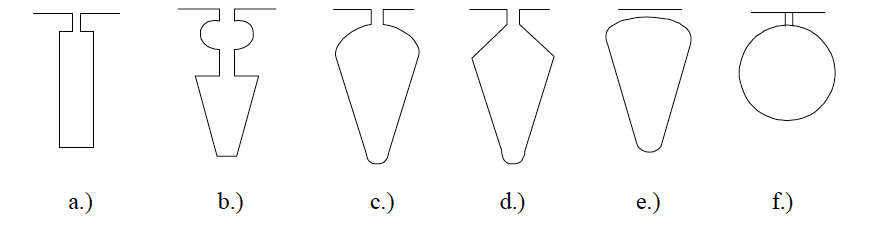

In [61]:
from IPython.display import Image
Image(filename='rotor1.png',width=600) 


Fig: Different type of rotor cage slots

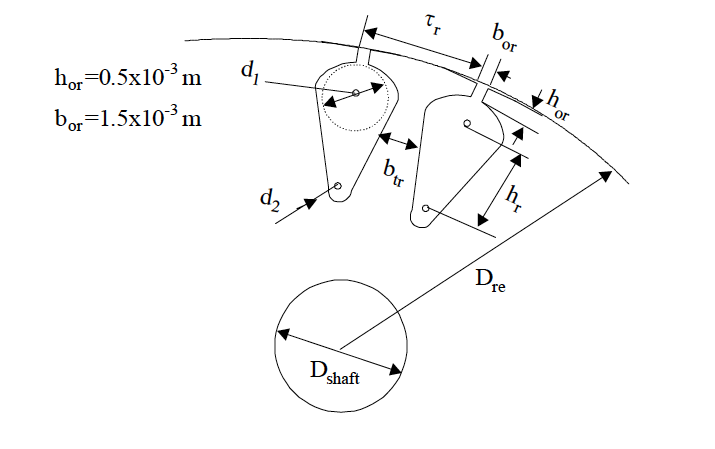

In [62]:
from IPython.display import Image
Image(filename='rotor2.png',width=600) 

Fig: Rotor slot geometry to be used

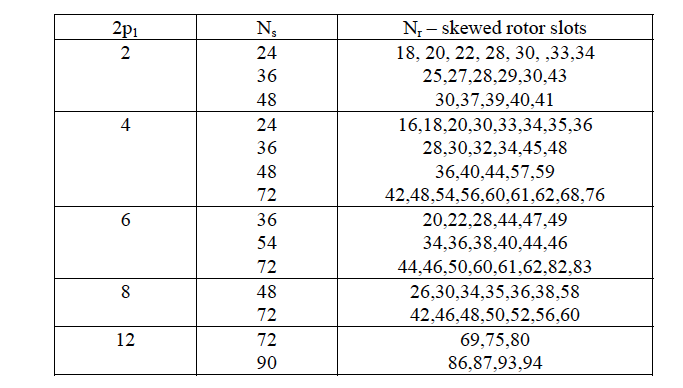

In [63]:
from IPython.display import Image
Image(filename='stator2rotor.png',width=600) 

Fig : Stator / rotor slot numbers

N_rotor =48 is chosen for our case.

In [64]:
N_rotor =48

In [65]:
K1=0.8*pf+0.2 #
I_b=K1*2*3*W1*K_w1*I_rated/(N_rotor)
print ('I_b=',round(I_b),'A')

I_b= 607 A


In [66]:
J_b=4 # A/mm^2 

In [67]:
A_b=I_b/J_b/1e6 # mm^2
print ('A_b=',round(A_b,6),'mm^2')

A_b= 0.000152 mm^2


In [68]:
I_er=I_b/(2*math.sin(math.pi*pole_pair/N_rotor))
print ('I_er=',round(I_er,2),'A')

I_er= 2326.0 A


In [69]:
J_er=0.8*J_b
print ('J_er=',round(J_er,2),'A/mm^2')

J_er= 3.2 A/mm^2


In [70]:
A_er=I_er/J_er
print ('A_er=',round(A_er,2),'A/mm^2')

A_er= 726.87 A/mm^2


In [71]:
H_or=0.5e-3
B_or=1.5e-3
τ_r=math.pi*(D_is-2*g*1e-2)/N_rotor
print ('τ_r=',round(τ_r*1000,2),'mm')

τ_r= 12.11 mm


In [72]:
B_tr=1.6 # in T, rotor tooth flux density
H_tr=2460 # A/m, magnetic field intensity
B_cr=1.65 # rotor back core flux density
b_tr=(Bg*τ_r)/(K_fe*B_tr)
print ('b_tr=',round(b_tr*1000,3),'mm')

b_tr= 4.318 mm


In [73]:
D_re=D_is-2*g*1e-2
print ('D_re=',round(D_re*1000,3),'mm')

D_re= 185.03 mm


In [74]:
d1=(math.pi*(D_re-2*H_or)-N_rotor*b_tr)/(math.pi+N_rotor)
round(d1*1000,3) # in mm
print ('d1=',round(d1*1000,3),'mm')

d1= 7.252 mm


In [75]:
d2=4.7e-3 # m

In [76]:
H_r=(d1-d2)/(2*math.tan(math.pi/N_rotor))
print ('H_r=',round(H_r*1000,3),'mm')

H_r= 19.47 mm


In [77]:
Fm_tr=H_tr*(H_r+H_or+(d1+d2)/2)
round(Fm_tr) # Aturns

64

In [78]:
H_cr=φ/(2*L*B_cr)
print ('H_cr=',round(H_cr*1000,3),'mm')


H_cr= 24.599 mm


In [79]:
Ds_max=D_is*10-2*g-2*(H_or+(d1+d2)/2+H_r+H_cr)
print ('Ds_max=',round(Ds_max*1000,3),'mm')

Ds_max= 173.138 mm


In [80]:
T_en=p_rated/(2*math.pi*f_rated*(1-s)/pole_pair)
print ('T_en=',round(T_en,3),'Nm')

T_en= 448.399 Nm


In [81]:
D_er=D_re-3.5e-3
print ('D_er=',round(D_er*1000,3),'mm')

D_er= 181.53 mm


In [82]:
b=1.2*(H_r+H_or+(d1+d2)/2)
round(b*1000,3) # in mm
print ('b=',round(b*1000,3),'mm')


b= 31.135 mm


In [83]:
a=A_er/b 
print ('a=',round(a*1000,3),'mm')

a= 23346103.862 mm


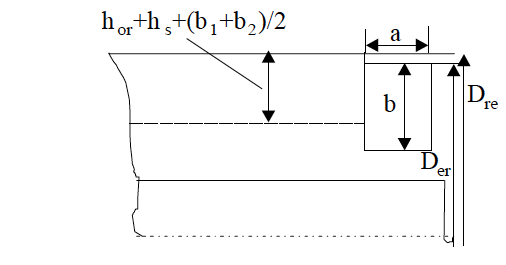

In [84]:
from IPython.display import Image
Image(filename='endring.png',width=500) 

                  Fig : end ring cross section

In [85]:
print('N_stator=',N_stator)
print('Stator outer diameter=',round(D_out*1000,3),'in mm')
print('Stator inner diameter=',round(D_is*1000,3),'in mm')
print ('Slot_depth=',round((hos+hw+hs)*1000,3),'in mm')
print ('Slot_opening_depth=',round((hos)*1000,3),'in mm')
print ('Slot_opening_width=',round((bos)*1000,3),'in mm')
tas=math.atan(2*hw/(bs1-bos))*400/(math.pi*2)
print ('Tooth_tip_angle=',round(tas),'in Grad')
print ('Slot_corner_radius=',round((d2/2)*1000,3),'in mm')


N_stator= 36.0
Stator outer diameter= 326.681 in mm
Stator inner diameter= 202.542 in mm
Slot_depth= 18.478 in mm
Slot_opening_depth= 1.1 in mm
Slot_opening_width= 2.3 in mm
Tooth_tip_angle= 16 in Grad
Slot_corner_radius= 2.35 in mm


In [86]:
print('N_rotor=',N_rotor)
print('Air_gap_length=',round(g,3),'in mm')
print('Shaft_diameter=',round(Ds_max*1000,3),'in mm')
print('Tooth_tip_angle=',round((12*400/360),3),'in Grad')
sdr=H_or+(H_r+d1+d2)/2
print('Slot_depth_rotor=',round(sdr*1000,3),'in mm')
print('Tooth_width=',round((b_ts)*1000,6),'in mm')
print ('Slot_opening_radius=',round(H_or*1000,3),'in mm')
print ('Slot_opening_depth=',round(B_or*1000,3),'in mm')
print ('Slot_corner_radius=',round((d2/2)*1000,4),'in mm')
print ('Lamination_length=',round(L*1000,4),'in mm')
rbs=math.atan(τ_r/L)*400/(2*math.pi)
print ('Rotor_bar_skew=',round(rbs,4),'in Grad')


N_rotor= 48
Air_gap_length= 0.876 in mm
Shaft_diameter= 173.138 in mm
Tooth_tip_angle= 13.333 in Grad
Slot_depth_rotor= 16.211 in mm
Tooth_width= 4.72655 in mm
Slot_opening_radius= 0.5 in mm
Slot_opening_depth= 1.5 in mm
Slot_corner_radius= 2.35 in mm
Lamination_length= 254.5218 in mm
Rotor_bar_skew= 3.0268 in Grad


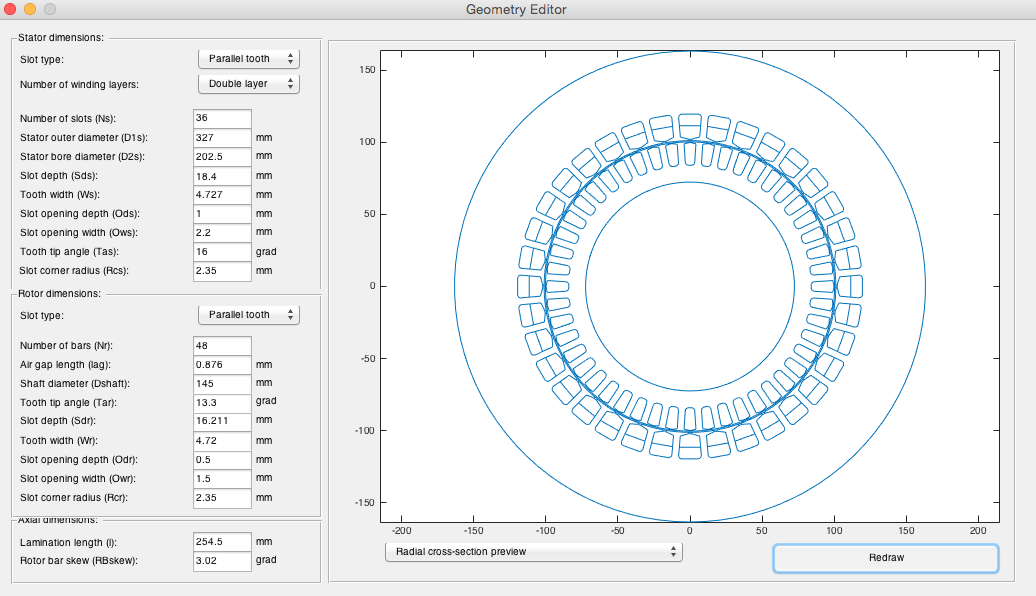

In [87]:
from IPython.display import Image
Image(filename='geometric.png',width=1000) 

Fig : Geometry editor

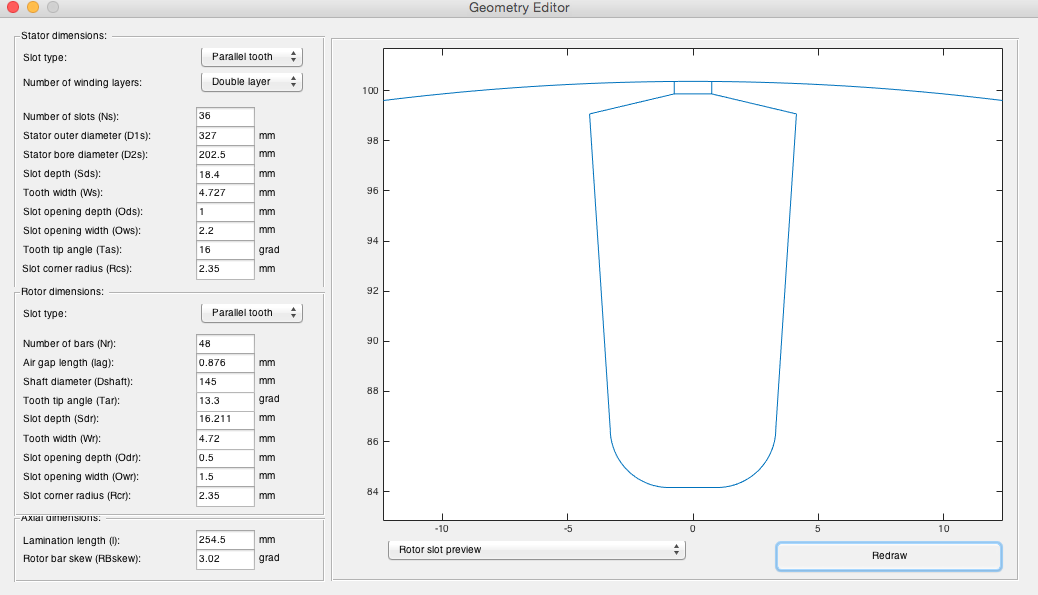

In [88]:
from IPython.display import Image
Image(filename='rotor4.png',width=1000) 

Fig : Rotor slot geometry

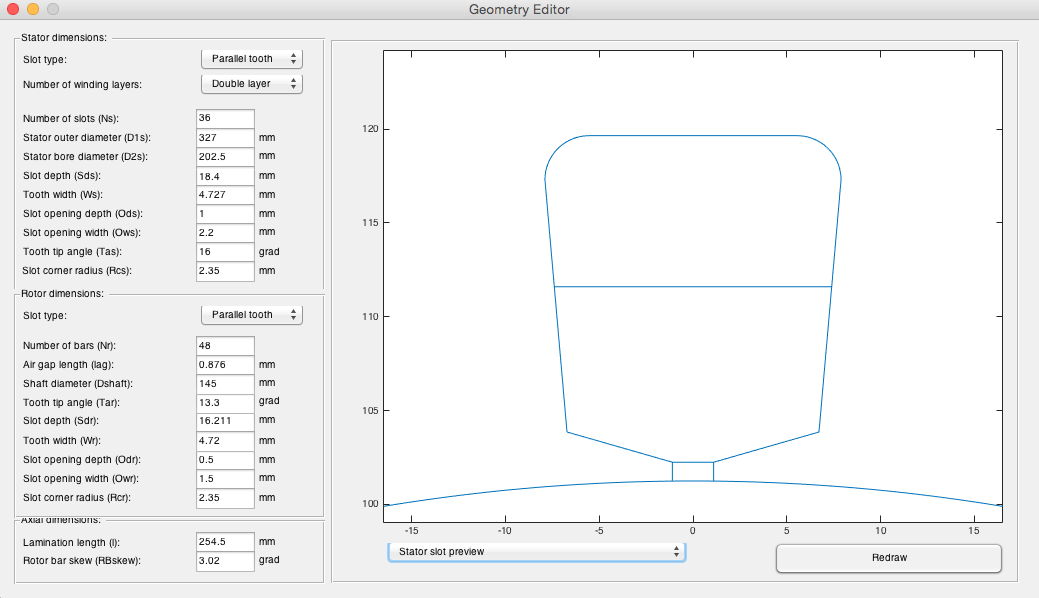

In [89]:
from IPython.display import Image
Image(filename='stator4.png',width=1000) 

Fig : Stator slot geometry

In [90]:
print('N_stator=',N_stator)
print('Layer=',ns,)
print('paralel_paths=',a1)
ks=5.96e7
print('w=',ns*a_p)
print('fill_factor=',K_fill)
print('ks=',ks)

N_stator= 36.0
Layer= 2
paralel_paths= 2
w= 200
fill_factor= 0.44
ks= 59600000.0


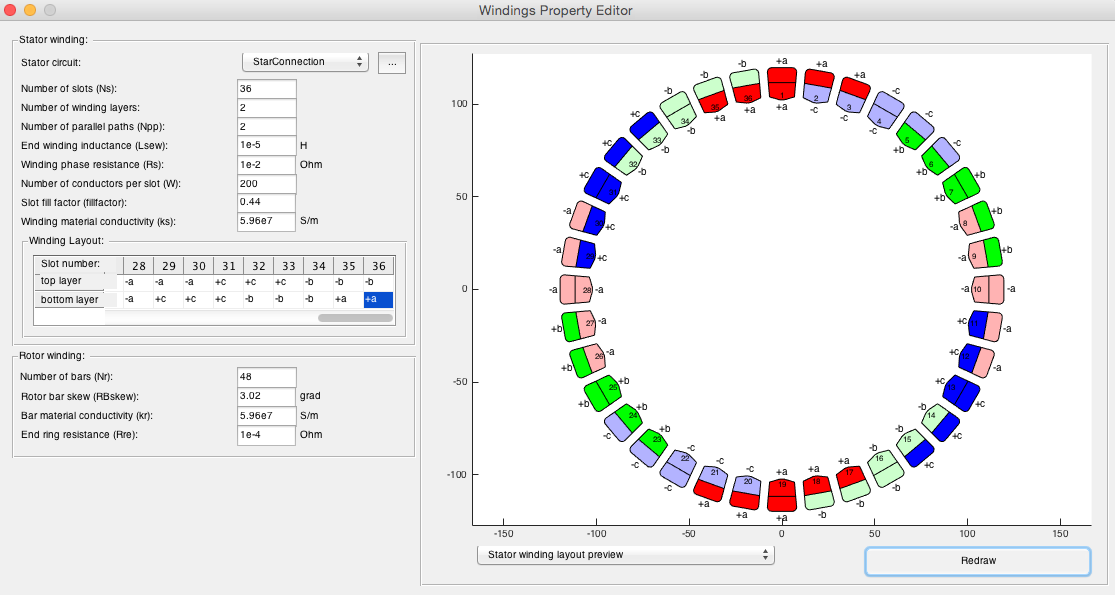

In [91]:
from IPython.display import Image
Image(filename='windingproperty.png',width=1000) 

Fig : Stator Windings

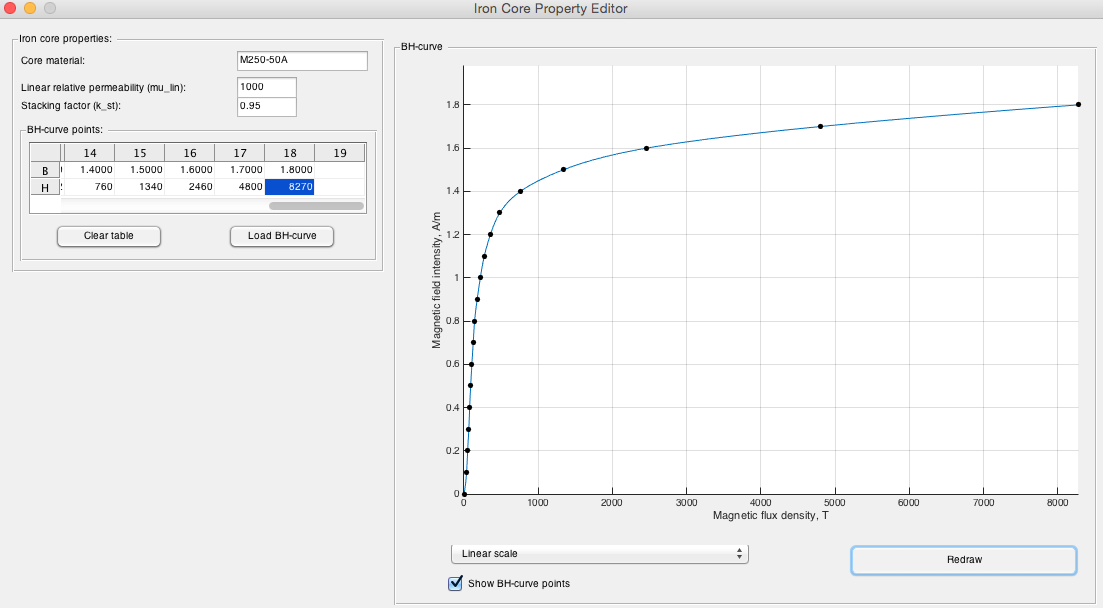

In [92]:
from IPython.display import Image
Image(filename='B_H.png',width=1000) 

Fig : B-H curve

# References

-http://keysan.me/ee564/
-I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002
-J. Pyrhönen, T. Jokinen, and V. Hrabovcová, "Design of Rotating Electrical Machines", Wiley, 2014
